<a href="https://colab.research.google.com/github/TonyZhang1994/Algorithm_Interview_Notes-Chinese/blob/master/CSCI544_PyTorchDL_Tutorial_Todo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Rujun (RJ) Han \\
Created: September 2019 \\
2nd Part adapted from TG's tutorial: https://colab.research.google.com/drive/10WICfaAQcXKDM8P07JuoeQL01pTx64TB 

# Objective

1.   Hands-on PyTorch Tutorial
2.   Demonstrate PyTorch end-to-end framework to build deep learning pipeline

# **Overview**

*   Colab Setup
*   PyTorch Fundamentals + Feed Forward Network
*   Task: Sentiment Analysis on Movie Reviews dataset
*   Data Preparation
*   Trainer
*   Evaluation


In [0]:
print("NLP is awesome!")

NLP is awesome!


# Colab Setup

### Enable GPU backend
Edit > Notebook Settings > Hardware Accelerator = GPU \\

### Locate where this notebook is saved
By default, it is saved in Google Drive. File > Locate in Drive \\

Summary: Colab is awesome (no setup required!) Thanks Google

# I. PyTorch Fundamentals

**Offical Website:** https://pytorch.org \\
An open source machine learning framework that accelerates the path from research prototyping to production deployment.

**Popular Alternatives:** Tensorflow, Keras, Theano, etc.

**PyTorch vs. Tensorflow** 
[Dynamic vs. Static computation graph](https://medium.com/@omaraymanomar/dynamic-vs-static-computation-graph-2579d1934ecf) (FAIR vs. Google AI)

## Practice I: Manipulating Tensors
Special case: Vector (1D); Matrix (2D)

In [0]:
import torch
## Resources
print('Using Torch', torch.__version__)
print('GPU available?', torch.cuda.is_available())

Using Torch 1.1.0
GPU available? True


In [0]:
torch.#tensor([0.1, 0.2])

In [0]:
dtype = torch.float
device = torch.device("cpu")
#device = torch.device("cuda:0") # Uncomment this to run on GPU

# N is (data) batch size; D_in is input dimension; 
# H is hidden dimension; D_out is output dimension.

N, D_in, H, D_out = 64, 1000, 100, 10 # 64 * 1000 --> 64 * 10

# Create random input and output data
x = torch.randn(N, D_in, device=device, dtype=dtype)

y = torch.randn(N, D_out, device=device, dtype=dtype)

# Randomly initialize weights
w1 = torch.randn(D_in, H, device=device, dtype=dtype)
w2 = torch.randn(H, D_out, device=device, dtype=dtype)

In [0]:
x.shape, y.shape, w1.shape, w2.shape

(torch.Size([64, 1000]),
 torch.Size([64, 10]),
 torch.Size([1000, 100]),
 torch.Size([100, 10]))

In [0]:
# matrix multiplication: X * W1 -- (64 * 1000) x (1000 * 100)
h1 = x.mm(w1)
h1.shape

torch.Size([64, 100])

### Todo (5 - 10 mins): 
Create a random tensor **b** with dimenson N * 1 \\
Update $h_1$ by adding **b** \\
Print shape of this tensor

In [0]:
## your code here

## Practice II: Activation Functions

Neural Network: [activation functions](https://en.wikipedia.org/wiki/Activation_function)

**Why do we need activation functions**?


1.   Non-linearity -- allows NN to approximate arbitrary functions
2.   Mapping output into probability space (softmax function)



In [0]:
torch.relu(x), x

(tensor([[2.3810, 0.0000, 0.0330,  ..., 0.0000, 2.0773, 0.4446],
         [0.3052, 0.0791, 0.0000,  ..., 0.2019, 1.5184, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.4033, 0.0000, 0.3911],
         ...,
         [0.0000, 0.0485, 0.0000,  ..., 1.1079, 0.3335, 0.9327],
         [0.0000, 2.1679, 0.0000,  ..., 0.0998, 0.0000, 0.4320],
         [0.6522, 0.6501, 0.0000,  ..., 0.0000, 0.0000, 1.0330]]),
 tensor([[ 2.3810, -1.1657,  0.0330,  ..., -1.6808,  2.0773,  0.4446],
         [ 0.3052,  0.0791, -1.1296,  ...,  0.2019,  1.5184, -0.7700],
         [-3.1773, -0.3608, -1.4235,  ...,  0.4033, -0.2724,  0.3911],
         ...,
         [-0.2724,  0.0485, -0.4152,  ...,  1.1079,  0.3335,  0.9327],
         [-0.2812,  2.1679, -0.1425,  ...,  0.0998, -0.4558,  0.4320],
         [ 0.6522,  0.6501, -1.5359,  ..., -1.9835, -2.1921,  1.0330]]))

### Todo (2 mins):
*   Update your previous previous calculation with sigmoid function.
*   Alternatively, you may try torch.relu(), torch.tanh(), etc.
*   Name the result as **h_activated**, output its dimension

In [0]:
## your code here

## Practice III: Loss Function and Supervised Learning

Supervised Learing vs. Unsupervised Learning? \\

Square Loss: $\sum_i^N (y - y_{pred})^2$ \\

Can we use $h_{activated}$ as $y_{pred}$, why and why not? 


### Todo (5 mins):
calculate $y_{pred} = h_{activated} * w_2 + c$, constant c is optional

In [0]:
### your code here

#loss = (y_pred - y).pow(2).sum().item()

## What's next?
We've built a very simple DL model architecture -- Feed Forward Neural Network. But how to learn parameters, i.e. $w_1, w_2, b, c$? 
*   [Backpropagation](https://brilliant.org/wiki/backpropagation/)
*   Iterate until convergence -- gradient descent



### Wrap everything up with PyTorch [NN modules](https://pytorch.org/docs/stable/nn.html). Search for torch.nn.linear.

In [0]:
class FFN(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(FFN, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        h_activated = self.linear1(x).sigmoid()
        y_pred = self.linear2(h_activated)
        return y_pred

In [0]:
model = FFN(D_in, H, D_out)

### Another (much more convenient) way to create loss function in PyTorch. 

PyTorch package contains most commonly used loss functions. But we can easily create our own and integrate it with PyTorch pipeline.

In [0]:
loss_fn = torch.nn.MSELoss(reduction='sum')

### Questions?

### PyTorch [Optimizers](https://pytorch.org/docs/stable/optim.html)

In [0]:
import torch.optim as optim

learning_rate = 1e-4
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

### Parameter learning through iterative algorithm. [Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent)

In [0]:
for t in range(10):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = # fill in the blank here

    # Compute and print loss.
    loss = loss_fn(,) # fill in the blank here
    
    print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters: w_1(t) = w_1(t-1) - lr * gradient(w_1)
    optimizer.step()

# II. Sentiment Analysis on Movie Reviews dataset 

### We will move very fast in this section; the goal is to demonstrate an end-to-end PyTorch pipeline for HW and project.

We want to build a non-linear (binary) classfier on text data.

Large Movie Review Dataset from https://ai.stanford.edu/~amaas/data/sentiment/

## Download data and tokenizer

In [0]:
![[ -f aclImdb_v1.tar.gz ]]  && echo "Data already Downloaded" || wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
![[ -d aclImdb ]] && echo "already extracted" || tar xf aclImdb_v1.tar.gz 
# Install Tokenizer
! pip install mosestokenizer

--2019-09-18 04:07:42--  https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  20.7MB/s    in 6.6s    

2019-09-18 04:07:49 (12.1 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]

     |████████████████████████████████| 51kB 2.1MB/s 
  Created wheel for toolwrapper: filename=toolwrapper-1.0.0-cp36-none-any.whl size=3225 sha256=e40587b5a38ae8d9221047a89daf92dff4f42774987d4cdc0a1c913c2060569b
  Stored in directory: /root/.cache/pip/wheels/5c/b0/2e/b8c414550c8372586ebaab634cf1f93733349cfe2b1d694fe8
Successfully built toolwrapper


In [0]:
!ls

aclImdb  aclImdb_v1.tar.gz  sample_data


## Data Preparation

### Tokenization

In [0]:
from pathlib import Path
from tqdm import tqdm 
from mosestokenizer import MosesTokenizer # SpaCy; NLTK; Wordpiece 
import logging as log

log.basicConfig(level=log.INFO)
tokr = MosesTokenizer()


def read_all(dir):
  """Reads a dataset of pos and neg text"""
  for p in dir.glob('pos/*.txt'):
    yield ('POS', p.read_text())
  for p in dir.glob('neg/*.txt'):
    yield ('NEG', p.read_text())

def read_tokenized(dir):
  """Tokenization wrapper"""
  for label, text in read_all(dir):
    yield (label, tokr(text))

train_ful_file = Path('train.ful.tok.tsv')
test_file = Path('test.tok.tsv')

if not train_ful_file.exists():
  log.info("creating train file")
  with train_ful_file.open('w') as w:
    for label, toks in tqdm(read_tokenized(Path('aclImdb/train'))):
      w.write(f'{label}\t{" ".join(toks)}\n')

if not test_file.exists():
  log.info("creating test file")
  with test_file.open('w') as w:
    for label, toks in tqdm(read_tokenized(Path('aclImdb/test'))):
      w.write(f'{label}\t{" ".join(toks)}\n')

INFO:mosestokenizer.tokenizer.MosesTokenizer:executing argv ['perl', '/usr/local/lib/python3.6/dist-packages/mosestokenizer/tokenizer-v1.1.perl', '-q', '-l', 'en', '-b', '-a']
INFO:mosestokenizer.tokenizer.MosesTokenizer:spawned process 843
INFO:root:creating train file
25000it [00:24, 1017.98it/s]
INFO:root:creating test file
25000it [00:23, 1003.59it/s]


In [0]:
tokr("I'd like to visit united-nations")

['I', '&apos;d', 'like', 'to', 'visit', 'united', '@-@', 'nations']

### Check Data and Sample Count

In [0]:
# Look at the stats  - sanity check
! wc -lw *.tsv
! head -2 *.tsv 
! tail -n 2 *.tsv 
! echo "Training"
! cut -f1 train.ful.tok.tsv | sort | uniq -c
! echo "Test"
! cut -f1 test.tok.tsv | sort | uniq -c

   25000  7064505 test.tok.tsv
   25000  7226208 train.ful.tok.tsv
   50000 14290713 total
==> test.tok.tsv <==
POS	The Academy Award winning &apos; Kramer vs. Kramer &apos; follows a snazzy businessman Ted Kramer ( Dustin Hoffman ) and his divorce with his bored wife ( Meryl Streep ) . One day Ted &apos;s wife leaves him and their child in search for a better life , forcing Ted to become closer to his son ( Justin Henry ) . The two bond and become very close ( but only after some friction ) , and just as everything is going perfect Ted &apos;s wife comes back to town and wants sole custody of their son . Ted then goes on a mission not to let his son get taken away from him , and fights his wife in court . Dustin Hoffman gives a tremendous performance along with Meryl Streep , and young Justin Henry is impressive . It &apos;s a sad emotional roller @-@ coaster of a movie , but it &apos;s a very well @-@ made and inspiring film . The film took the Oscar for Best Picture at the 1979 Acad

### Create Validation Data

*   To build machine learning models, we typically split data into train / validation / test.
*   Validataion data is used to tune hyper-parameters and prevent overfitting.

In [0]:
# shuffle ; first 2000 for validation, rest for training
! shuf train.ful.tok.tsv > train.ful.tok.tsv.shuf 
! awk 'NR  <= 2000 ' train.ful.tok.tsv.shuf > valid.tok.tsv
! awk 'NR  > 2000 ' train.ful.tok.tsv.shuf > train.tok.tsv
! wc -l train.* valid.* test.*

    25000 train.ful.tok.tsv
    25000 train.ful.tok.tsv.shuf
    23000 train.tok.tsv
     2000 valid.tok.tsv
    25000 test.tok.tsv
   100000 total


### Create Vocabulary

Scan all training text, create token to idx mapping. \\
Reserved types (tokens) are $<unk>, <pad>, <s>, </s>$

In [0]:
from typing import List, Iterator, Set, Dict, Optional, Tuple
from collections import Counter
from pathlib import Path

LABELS = ['NEG', 'POS']
RESERVED = ['<pad>', '<unk>', '<s>', '</s>']
# <s>, </s> are for future use during sequence modeling 

PAD_IDX = 0 
UNK_IDX = 1
MAX_TYPES = 40_000
MAX_SEQ_LEN = 100

class Vocab:
  """ Mapper of words <--> index """

  def __init__(self, types):
    # types is list of strings
    assert isinstance(types, list)
    assert isinstance(types[0], str)

    self.idx2word = types
    self.word2idx = {word: idx for idx, word in enumerate(types)}
    assert len(self.idx2word) == len(self.word2idx)  # One-to-One

  def __len__(self):
    return len(self.idx2word)
  
  def save(self, path: Path):
    log.info(f'Saving vocab to {path}')
    with path.open('w') as wr:
      for word in self.idx2word:
        wr.write(f'{word}\n')
 
  @staticmethod
  def load(path):
    log.info(f'loading vocab from {path}')
    types = [line.strip() for line in path.open()]
    for idx, tok in enumerate(RESERVED): # check reserved
      assert types[idx] == tok
    return Vocab(types)

  @staticmethod
  def from_text(corpus: Iterator[str], max_types: int,
                             min_freq: int = 5):
    """
    corpus: text corpus; iterator of strings
    max_types: max size of vocabulary
    min_freq: ignore word types that have fewer ferquency than this number
    """
    log.info("building vocabulary; this might take some time")
    term_freqs = Counter(tok for line in corpus for tok in line.split())
    for r in RESERVED:
      if r in term_freqs:
        log.warning(f'Found reserved word {r} in corpus')
        del term_freqs[r]
    term_freqs = list(term_freqs.items())
    log.info(f"Found {len(term_freqs)} types; given max_types={max_types}")
    term_freqs = {(t, f) for t, f in term_freqs if f >= min_freq}
    log.info(f"Found {len(term_freqs)} after dropping freq < {min_freq} terms")
    term_freqs = sorted(term_freqs, key=lambda x: x[1], reverse=True)
    term_freqs = term_freqs[:max_types]
    types = [t for t, f in term_freqs]
    types = RESERVED + types   # prepend reserved words
    return Vocab(types)


train_file = Path('train.tok.tsv')
valid_file = Path('valid.tok.tsv')
vocab_file = Path('vocab.txt')

if not vocab_file.exists():
  train_corpus = (line.split('\t')[1] for line in Path('train.tok.tsv').open())
  vocab = Vocab.from_text(train_corpus, max_types=MAX_TYPES, min_freq=5)
  vocab.save(vocab_file)
else:
  vocab = Vocab.load(vocab_file)

log.info(f'Vocab has {len(vocab)} types')

INFO:root:building vocabulary; this might take some time
INFO:root:Found 100879 types; given max_types=40000
INFO:root:Found 32722 after dropping freq < 5 terms
INFO:root:Saving vocab to vocab.txt
INFO:root:Vocab has 32726 types


In [0]:
s1 = [5, 4, 9, 10]
s2 = [6, 7, 8, 0]

In [0]:
[(k,v) for k,v in vocab.word2idx.items()][:10]

[('<pad>', 0),
 ('<unk>', 1),
 ('<s>', 2),
 ('</s>', 3),
 ('the', 4),
 (',', 5),
 ('.', 6),
 ('and', 7),
 ('a', 8),
 ('of', 9)]

In [0]:
print(vocab.idx2word[0], vocab.idx2word[1])

<pad> <unk>


### Create [Dataloader](https://pytorch.org/docs/1.1.0/data.html)

Batch computation \\
Dataloader is generally a good practice in deep learning as data are usually very large.

In [0]:
import copy
import random

Example = Tuple[List[int], int]

class TextDataset:

  def __init__(self, vocab: Vocab, path: Path, labels=LABELS, 
               has_label=True, max_len=MAX_SEQ_LEN):
    self.vocab = vocab
    self.label_map = Vocab(labels)
    log.info(f'loading data from {path}')
    # for simplicity, loading everything to memory; on large datasets this will cause OOM
    fields = [line.split('\t') for line in path.open()]

    labels = [l for l, _ in fields]
    text = [line.strip().split() for _, line in fields] # white space tokenizer
    self.text = [toks[:max_len] for toks in text] # truncate long seqs

    # Convert words to integer indexes
    ys = [self.label_map.word2idx[l] for l in labels]
    # words to index; out-of-vocab words are replaced with UNK
    xs = [[self.vocab.word2idx.get(tok, UNK_IDX) for tok in tokss] 
                 for tokss in text]
    self.data: List[Example] = list(zip(xs, ys))
    label_stats = Counter(ys)
    log.info(f"Found {len(self.data)} records in {path}; labels={label_stats}")

  def as_batches(self, batch_size, shuffle=True):
    data = self.data
    if shuffle:
      random.shuffle(data)
    for i in range(0, len(data), batch_size): # i incrememt by batch_size
      batch = data[i: i + batch_size]  # slice
      yield self.batch_as_tensors(batch)
  
  @staticmethod
  def batch_as_tensors(batch: List[Example]):
    labels = [label for seq, label in batch]
    seqs = [seq for seq, label in batch]
    label_tensor = torch.tensor(labels, dtype=torch.long)
    n_ex = len(batch)
    max_len = max(len(seq) for seq in seqs)
    seqs_tensor = torch.full(size=(n_ex, max_len), fill_value=PAD_IDX,
                             dtype=torch.long)
    for i, seq in enumerate(seqs):
      seqs_tensor[i, 0:len(seq)] = torch.tensor(seq)
    return seqs_tensor, label_tensor

valid_data = TextDataset(vocab=vocab, path=valid_file)
train_data = TextDataset(vocab=vocab, path=train_file)

INFO:root:loading data from valid.tok.tsv
INFO:root:Found 2000 records in valid.tok.tsv; labels=Counter({1: 1016, 0: 984})
INFO:root:loading data from train.tok.tsv
INFO:root:Found 23000 records in train.tok.tsv; labels=Counter({0: 11516, 1: 11484})


In [0]:
for x in train_data.as_batches(batch_size=1):
  print(x.shape)
  print(x)
  break

(tensor([[    1,  9623,    21,    20,  1329,    16,     4,  2142,     9,  7984,
            20,    12,     8,  2452,  1457,    30,    10,   131,     6,   613,
          9623,  1601,   232,     8,  4579,  3520,    58,   467,  4843,     6,
            63,    12,     8,    27,    19,   209,    10,    41,  1003,   232,
            70,   316,     5,   817,     7,  1078,   105,    10,    98,    16,
             4,   304,  1218,   101,  2907,     6,    14,    15,    11,    13,
            14,    15,    11,    13,    63,   134,     8,  8672,    35,     4,
          1631,     1,    21,   329,    58,     4,   193,   803,     5,     4,
           197, 19847,     4,   233,    10,     4,  1010,    72,   547,   798,
           148,    47,   174,   304,   123,   987,     7,  3893,     6,  2731,
            44,    12,  3301,    16,    44,   113,     5,    57,   206,    10,
             4,   437,   431,     5,    33,    85,    44,   209,    10,   142,
             4,   992,   246,     9,  3457,     6, 

## [Word Embedding](https://towardsdatascience.com/introduction-to-word-embedding-and-word2vec-652d0c2060fa)

Word2vec \\
GloVe \\
fastText \\
ELMO \\
BERT \\

In [0]:
import torch.nn as nn
class FNN_embedding(nn.Module):

  def __init__(self, vocab_size, n_class, emb_dim=50, hid=10, dropout=0.1):
    super().__init__() # call is necessary as per Pytorch API design
    # embedding_dim same as n_class
    self.embedding = nn.Embedding(num_embeddings=vocab_size,
                                  embedding_dim=emb_dim, padding_idx=PAD_IDX)
    
    self.linear1 = nn.Linear(emb_dim, hid)
    self.linear2 = nn.Linear(hid, n_class)
    self.dropout = nn.Dropout(p=dropout)

  def forward(self, seqs, log_probs=True):
    """Return log Probabilities"""
    batch_size, max_len = seqs.shape
    embs = self.embedding(seqs)  # embs[Batch x SeqLen x EmbDim]
    embs = self.dropout(embs)
    
    mask = seqs == 0             # Masking padded time steps 
    mask = mask.view(batch_size, max_len, 1)   # unsqueeze(2)
    embs.masked_fill(mask, value=0)
    embs = embs.sum(dim=1)   # sum over all all steps in seq

    hid_activated = torch.relu(self.linear1(embs)) # Non linear
    scores = self.linear2(hid_activated)

    if log_probs:
      return torch.log_softmax(scores, dim=1)
    else:
      return torch.softmax(scores, dim=1)

## Trainner Object --> train(), similar to what we just did in Part I.


1.   Initilize model
2.   Pick an optimizer and a loss function
3.   Iterate through data N times
4.   model.train()
5.   batch calculation / prediction
6.   optimizer.zero_grad()
7.   Feed data into model and compute y_pred + loss
8.   loss.backward()
9.   evaluation --> model.eval()
10.  go back to step 4  



In [0]:
# Trainer Optimizer 
import time
from tqdm import tqdm

def train(model, optimizer, n_epochs, batch_size, train_data, valid_data, device=torch.device('cuda')):
  log.info(f"Moving model to {device}")
  model = model.to(device)   # move model to desired device 
  log.info(f"Device for training {device}")
  losses = []
  for epoch in range(n_epochs):
    start = time.time()
    num_toks = 0
    train_loss = 0.
    n_train_batches = 0

    model.train() # switch to train mode 
    with tqdm(train_data.as_batches(batch_size=batch_size), leave=False) as data_bar:
      for seqs, labels in data_bar:
        # Move input to desired device
        seqs = seqs.to(device)
        labels = labels.to(device)
        
        num_toks += (seqs != PAD_IDX).sum().item()

        log_probs = model(seqs)
        loss = loss_func(log_probs, labels).sum() / len(seqs)
        train_loss += loss.item()
        
        n_train_batches += 1

        optimizer.zero_grad()         # clear grads
        loss.backward()
        optimizer.step()

        toks_speed = num_toks / (time.time() - start)
        pbar_msg = f'Loss:{loss.item():.4f} {int(toks_speed)} toks/s'
        data_bar.set_postfix_str(pbar_msg)
      
    # Run validation
    with torch.no_grad():
      model.eval() # switch to inference mode -- no grads, dropouts inactive
      
      val_loss = 0
      n_val_batches = 0
      for seqs, labels in valid_data.as_batches(batch_size=batch_size, shuffle=False):
        # Move input to desired device
        seqs = seqs.to(device)
        labels = labels.to(device)
        log_probs = model(seqs)
        loss = loss_func(log_probs, labels).sum() / len(seqs)
        val_loss += loss.item() 
        n_val_batches += 1
      
    avg_train_loss = train_loss / n_train_batches
    avg_val_loss = val_loss / n_val_batches
    losses.append((epoch, avg_train_loss, avg_val_loss))
    log.info(f"Epoch {epoch} complete; Losses: Train={avg_train_loss:G} Valid={avg_val_loss:G}")
  return losses

# Step 1
model = FNN_embedding(vocab_size=len(vocab), n_class=len(LABELS))
# Step 2
loss_func = nn.NLLLoss(reduction='none')
optimizer = optim.Adam(params=model.parameters())

losses = train(model, optimizer, n_epochs=10, batch_size=100, 
               train_data=train_data, valid_data=valid_data)

INFO:root:Moving model to cuda
INFO:root:Device for training cuda
INFO:root:Epoch 0 complete; Losses: Train=0.835289 Valid=0.668705
INFO:root:Epoch 1 complete; Losses: Train=0.620528 Valid=0.587551
INFO:root:Epoch 2 complete; Losses: Train=0.521444 Valid=0.503103
INFO:root:Epoch 3 complete; Losses: Train=0.422191 Valid=0.436336
INFO:root:Epoch 4 complete; Losses: Train=0.341995 Valid=0.398732
INFO:root:Epoch 5 complete; Losses: Train=0.285016 Valid=0.376304
INFO:root:Epoch 6 complete; Losses: Train=0.240073 Valid=0.366372
INFO:root:Epoch 7 complete; Losses: Train=0.2073 Valid=0.36486
INFO:root:Epoch 8 complete; Losses: Train=0.177015 Valid=0.362477
INFO:root:Epoch 9 complete; Losses: Train=0.15255 Valid=0.366085


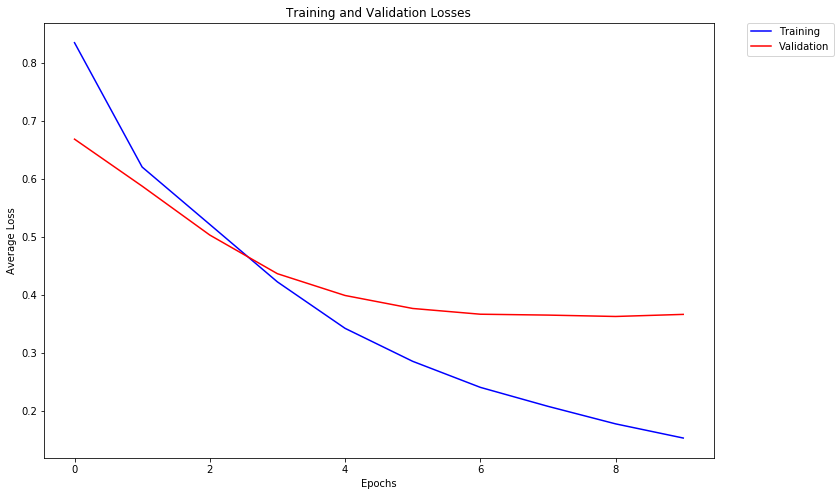

In [0]:
# Visualize the losses
from matplotlib import pyplot as plt

def viz_losses(losses):
  epochs = [e for e, t, v in losses]
  train_losses = [t for e, t, v in losses]
  val_losses = [v for e, t, v in losses]
  
  plt.figure(figsize=(12, 8))
  plt.plot(epochs, train_losses, color='blue', label = 'Training')
  plt.plot(epochs, val_losses, color='red', label='Validation')
  plt.xlabel('Epochs')
  plt.ylabel('Average Loss')
  plt.title('Training and Validation Losses')
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.show()

viz_losses(losses)

## Report model performance on test data

In [0]:
test_data = TextDataset(vocab=vocab, path=Path('test.tok.tsv'))

INFO:root:loading data from test.tok.tsv
INFO:root:Found 25000 records in test.tok.tsv; labels=Counter({1: 12500, 0: 12500})


In [0]:
from collections import defaultdict as ddict

def confusion_matrix(model, test_data, batch_size=100, device=torch.device('cuda')):
  matrix = ddict(lambda:ddict(int))
  with torch.no_grad():
    model.eval()
    for seqs, truth in test_data.as_batches(batch_size=batch_size):
      seqs = seqs.to(device)
      truth = truth.to(device)
      
      log_probs = model(seqs)
      top_class = log_probs.argmax(dim=1)
      for tru, pred in zip(truth.tolist(), top_class.tolist()):
        matrix[tru][pred] += 1

  d = matrix
  matrix = torch.zeros(len(d), len(d))
  for tru, preds in d.items():
    for pred, count in preds.items():
      matrix[tru][pred] = count
  return matrix  

def report_performance(model):
  cnf_mat = confusion_matrix(model, test_data, device=torch.device('cuda'))
  print("Labels: ", LABELS)
  print('Confusion Matrix:', cnf_mat)
  accuracy = cnf_mat.diag().sum() / cnf_mat.sum()
  print('Accuracy:', accuracy)
  precision = cnf_mat.diag() / cnf_mat.sum(dim=0)
  print('Precision:', precision)
  recall = cnf_mat.diag() / cnf_mat.sum(dim=1)
  print('Recall:', recall)
  f1 = 2 * precision * recall / (precision + recall) 
  print("F1:",  f1)

report_performance(model)

Labels:  ['NEG', 'POS']
Confusion Matrix: tensor([[10828.,  1672.],
        [ 1761., 10739.]])
Accuracy: tensor(0.8627)
Precision: tensor([0.8601, 0.8653])
Recall: tensor([0.8662, 0.8591])
F1: tensor([0.8632, 0.8622])
